In [1]:
import pandas as pd 
import pickle
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [2]:
data = []
with (open("saved_results/clients_data", "rb")) as openfile:
    while True:
        try:
            data.append(pickle.load(openfile))
        except EOFError:
            break

In [3]:
#One dataframe per household
dfs_train = [None]*25
dfs_test = [None]*25

for i in range(len(data[0])):
    #Create train dfs
    mat_train = np.matrix(data[0][i][0])
    dfs_train[i] = pd.DataFrame(mat_train)
    dfs_train[i]['pred'] = data[0][i][1].tolist()
    
    #Create test dfs
    mat = np.matrix(data[0][i][2])
    dfs_test[i] = pd.DataFrame(mat)
    dfs_test[i]['pred'] = data[0][i][3].tolist()

In [10]:
dfs_train[0]["pred"]

0     -0.887442
1     -0.945703
2     -1.039701
3     -1.082384
4     -0.896509
         ...   
300    2.095739
301   -0.284730
302    0.056683
303   -0.592587
304   -0.657628
Name: pred, Length: 305, dtype: float64

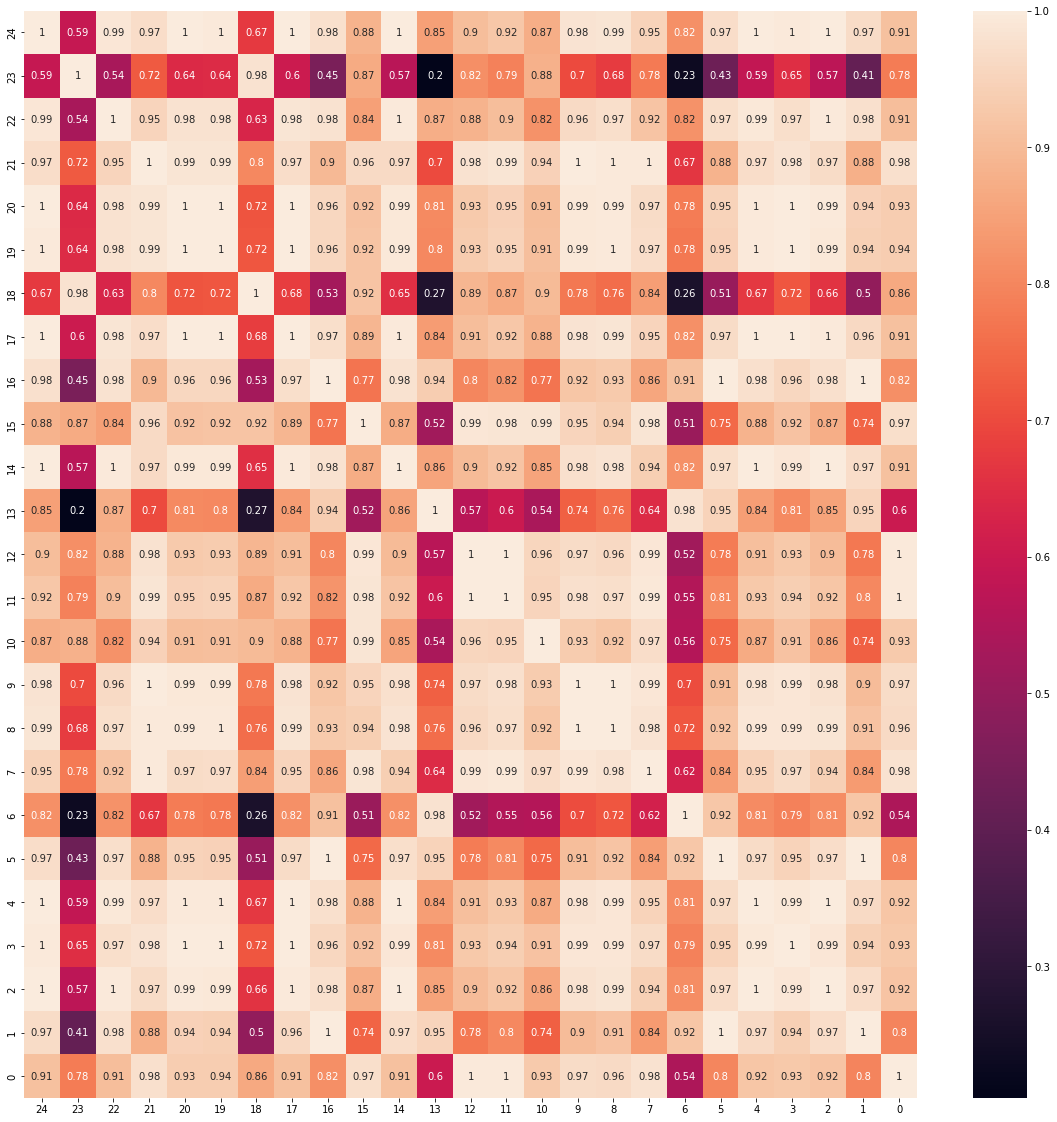

In [21]:
df = pd.DataFrame()
for i in range(0,25):
    df.insert(0, str(i), list(dfs_train[i]["pred"]) , True)
    
corrMatrix = df.corr()
plt.figure(figsize = (20,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

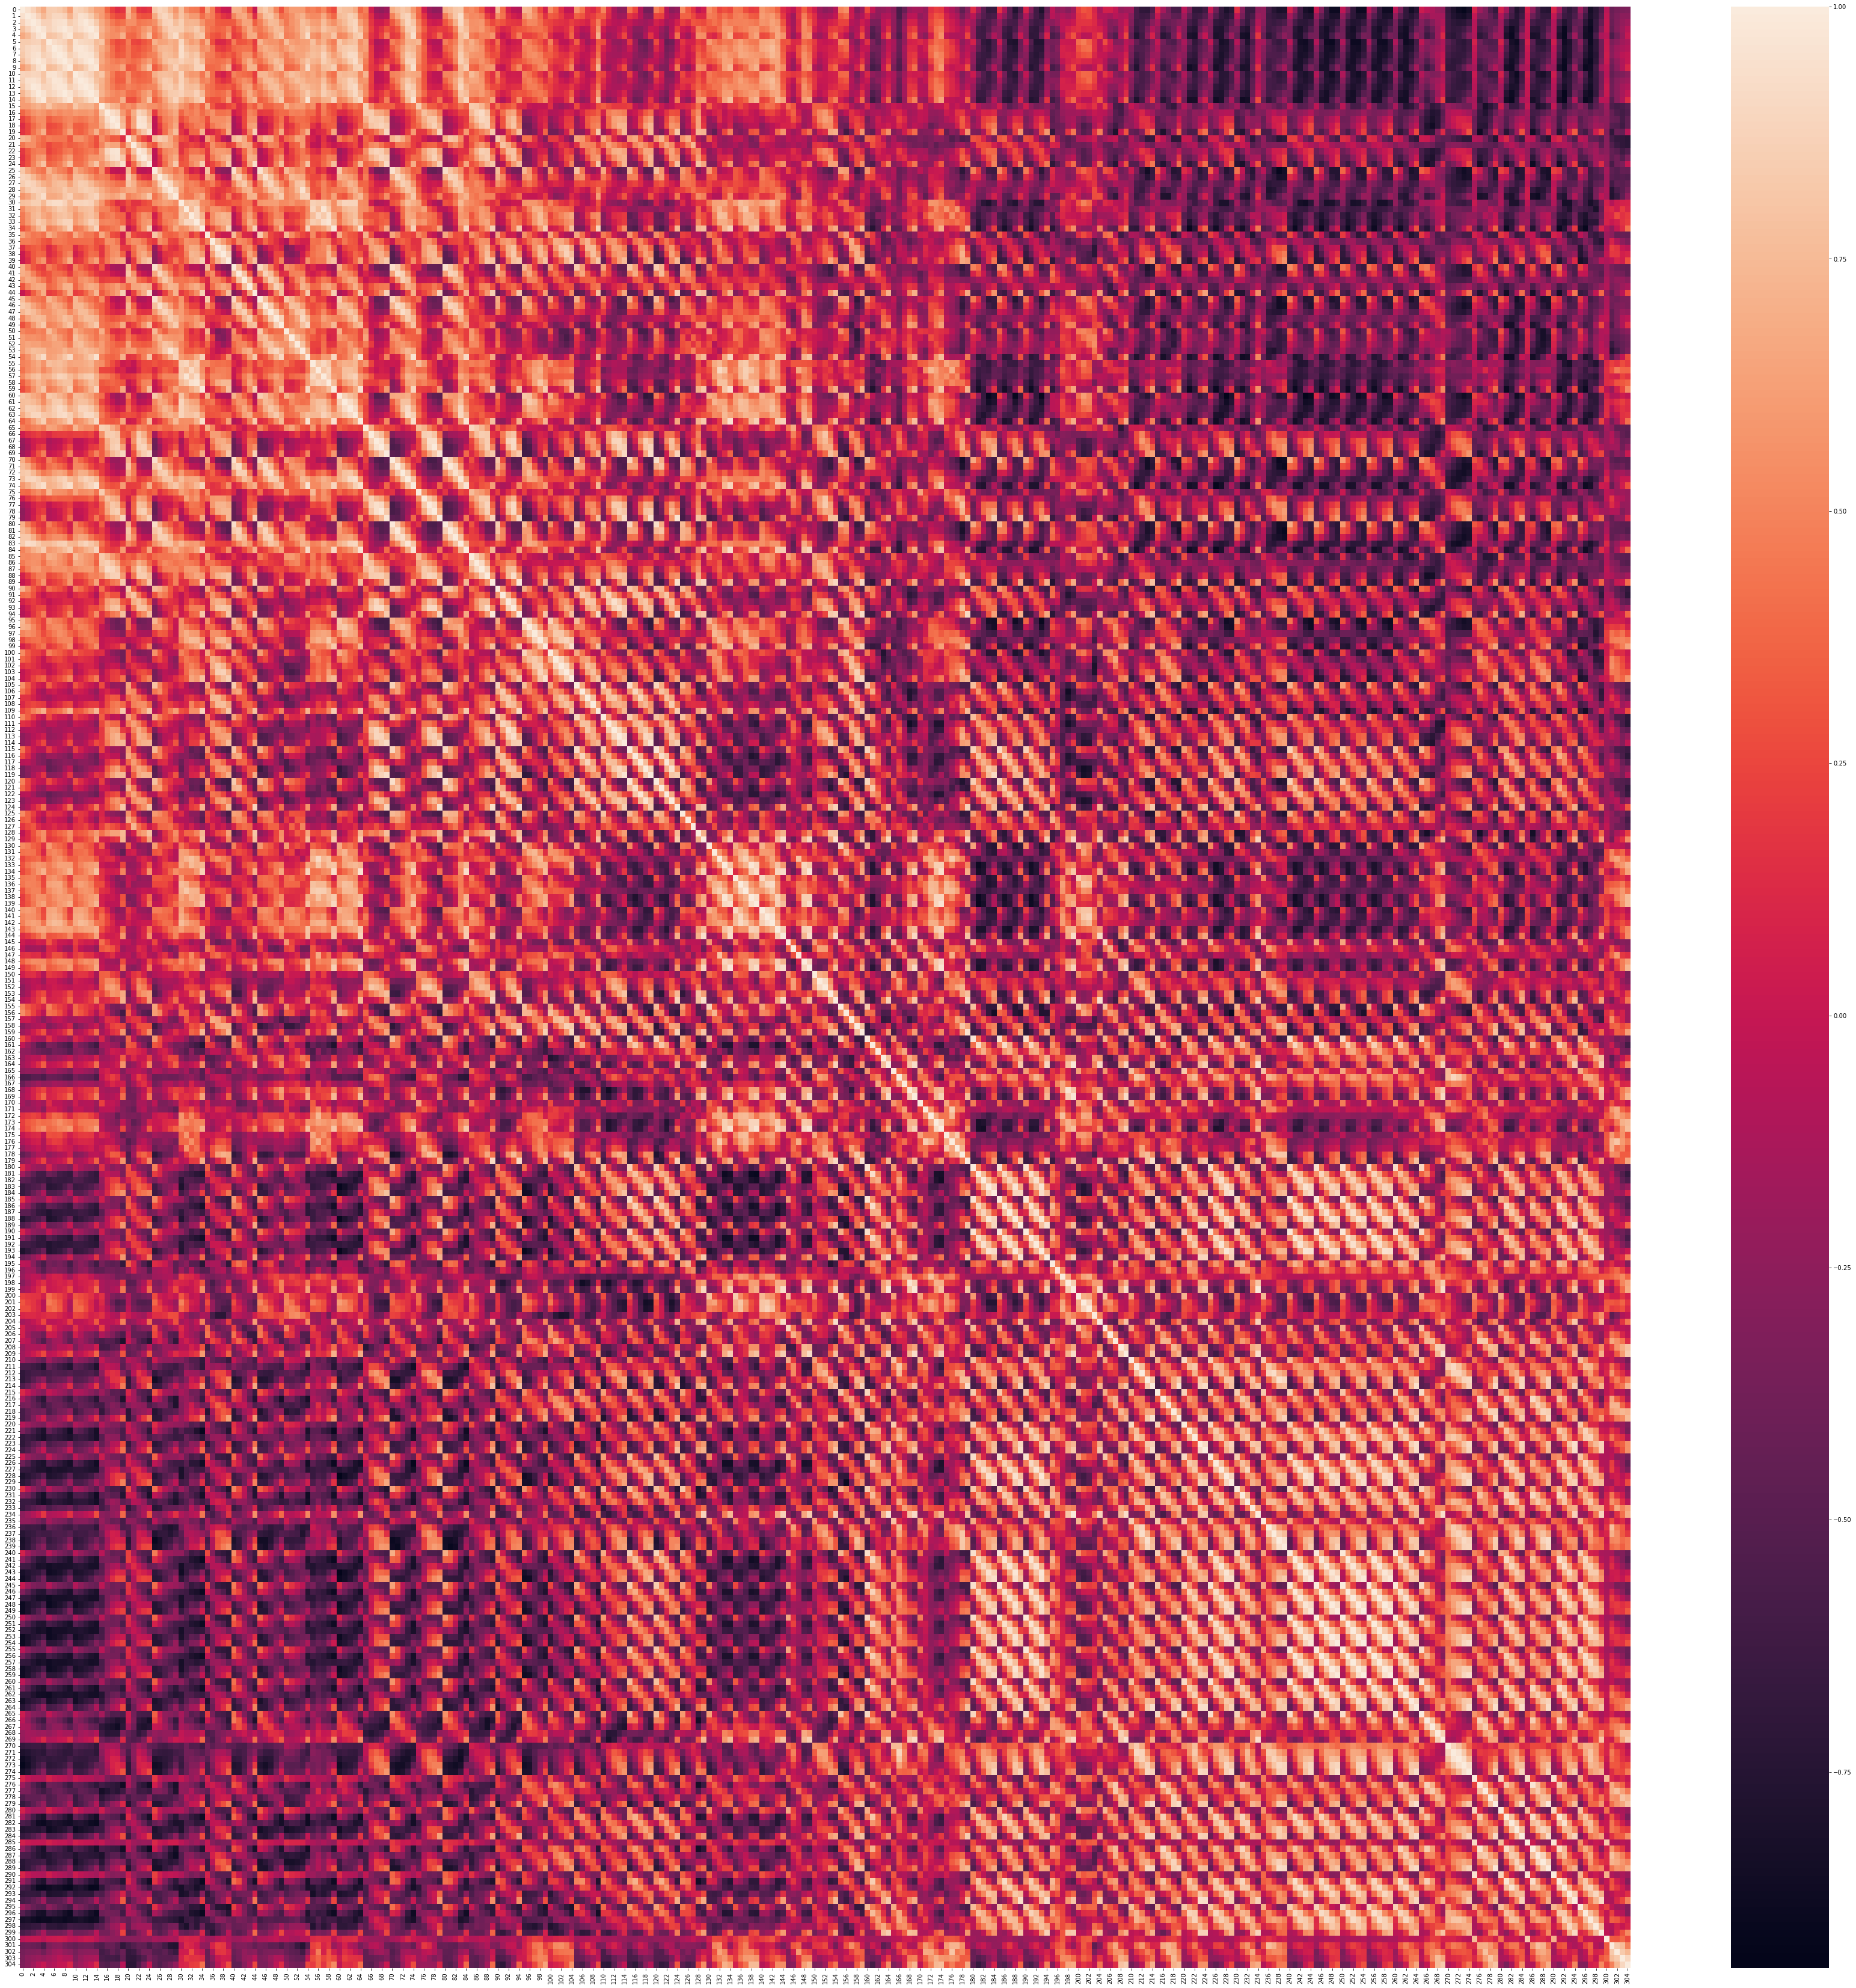

In [20]:
df = dfs_train[1].drop("pred", axis = 1)
corrMatrix = pd.DataFrame(df.transpose()).corr()
plt.figure(figsize = (60,60))
sn.heatmap(corrMatrix)
plt.show()

In [21]:
som = 0
num = 0
for i in range(len(corrMatrix)): 
    for j in range(len(corrMatrix)):
        if i<j:
            som += corrMatrix.iloc[i,j]
            
            num += 1
            
mean = som/num
mean  




0.003015953106031188